скачиваем пакеты и смотрим данные

In [1]:
# импорт пакетов
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# чтение данных
df = pd.read_csv('stud_math.csv')

# shape and data types of the data
print(df.shape)
print(df.dtypes)

# отбор числовых колонок
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# отбор нечисловых колонок
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

(395, 30)
school                  object
sex                     object
age                      int64
address                 object
famsize                 object
Pstatus                 object
Medu                   float64
Fedu                   float64
Mjob                    object
Fjob                    object
reason                  object
guardian                object
traveltime             float64
studytime              float64
failures               float64
schoolsup               object
famsup                  object
paid                    object
activities              object
nursery                 object
studytime, granular    float64
higher                  object
internet                object
romantic                object
famrel                 float64
freetime               float64
goout                  float64
health                 float64
absences               float64
score                  float64
dtype: object
['age' 'Medu' 'Fedu' 'traveltime' 'studytime' 

обнаруживаем пропущенные данные

<AxesSubplot:>

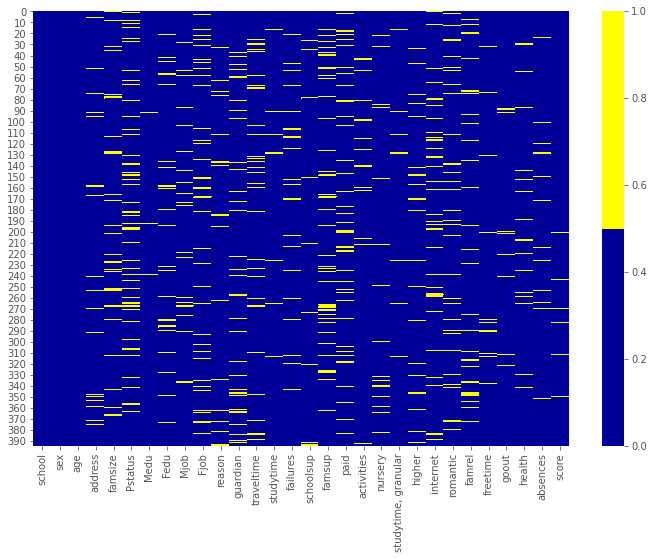

In [86]:
cols = df.columns[:30] # первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

 рассмотрим их в списке процентов.

In [87]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

school - 0.0%
sex - 0.0%
age - 0.0%
address - 4.0%
famsize - 7.0%
Pstatus - 11.0%
Medu - 1.0%
Fedu - 6.0%
Mjob - 5.0%
Fjob - 9.0%
reason - 4.0%
guardian - 8.0%
traveltime - 7.0%
studytime - 2.0%
failures - 6.0%
schoolsup - 2.0%
famsup - 10.0%
paid - 10.0%
activities - 4.0%
nursery - 4.0%
studytime, granular - 2.0%
higher - 5.0%
internet - 9.0%
romantic - 8.0%
famrel - 7.0%
freetime - 3.0%
goout - 2.0%
health - 4.0%
absences - 3.0%
score - 2.0%


в виде гистограммы

created missing indicator for: address
created missing indicator for: famsize
created missing indicator for: Pstatus
created missing indicator for: Medu
created missing indicator for: Fedu
created missing indicator for: Mjob
created missing indicator for: Fjob
created missing indicator for: reason
created missing indicator for: guardian
created missing indicator for: traveltime
created missing indicator for: studytime
created missing indicator for: failures
created missing indicator for: schoolsup
created missing indicator for: famsup
created missing indicator for: paid
created missing indicator for: activities
created missing indicator for: nursery
created missing indicator for: studytime, granular
created missing indicator for: higher
created missing indicator for: internet
created missing indicator for: romantic
created missing indicator for: famrel
created missing indicator for: freetime
created missing indicator for: goout
created missing indicator for: health
created missing indi

<AxesSubplot:xlabel='index'>

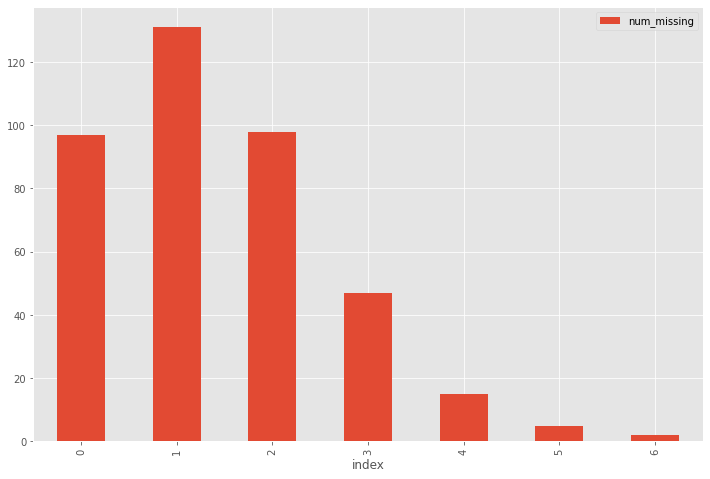

In [88]:
# сначала создаем индикатор для признаков с пропущенными данными
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# затем на основе индикатора строим гистограмму
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

Заполним все пропуски в числовых парамерах значением медианы.

In [89]:
# impute the missing values and create the missing value indicator variables for each numeric column.
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)

imputing missing values for: Medu
imputing missing values for: Fedu
imputing missing values for: traveltime
imputing missing values for: studytime
imputing missing values for: failures
imputing missing values for: studytime, granular
imputing missing values for: famrel
imputing missing values for: freetime
imputing missing values for: goout
imputing missing values for: health
imputing missing values for: absences
imputing missing values for: score


Решим проблему и с категориями внесением наиболее часто встречающихся значений.

In [90]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top'] # impute with the most frequent value.
        df[col] = df[col].fillna(top)

imputing missing values for: address
imputing missing values for: famsize
imputing missing values for: Pstatus
imputing missing values for: Mjob
imputing missing values for: Fjob
imputing missing values for: reason
imputing missing values for: guardian
imputing missing values for: schoolsup
imputing missing values for: famsup
imputing missing values for: paid
imputing missing values for: activities
imputing missing values for: nursery
imputing missing values for: higher
imputing missing values for: internet
imputing missing values for: romantic


обнаружим выбросы

<AxesSubplot:>

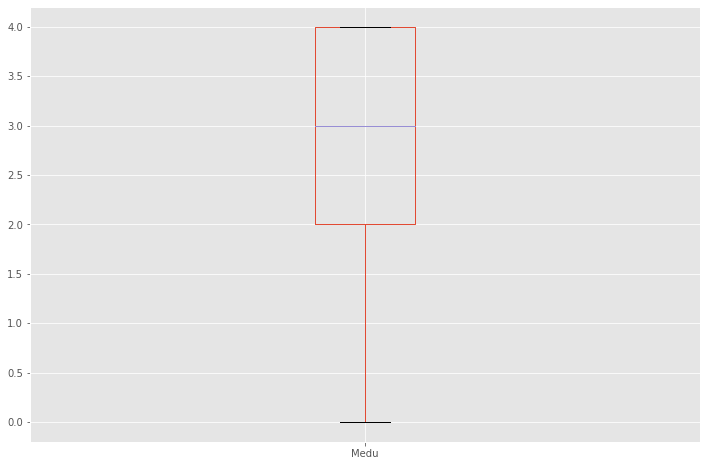

In [91]:
df.boxplot(column=['Medu'])

выбросы отсутствуют

<AxesSubplot:>

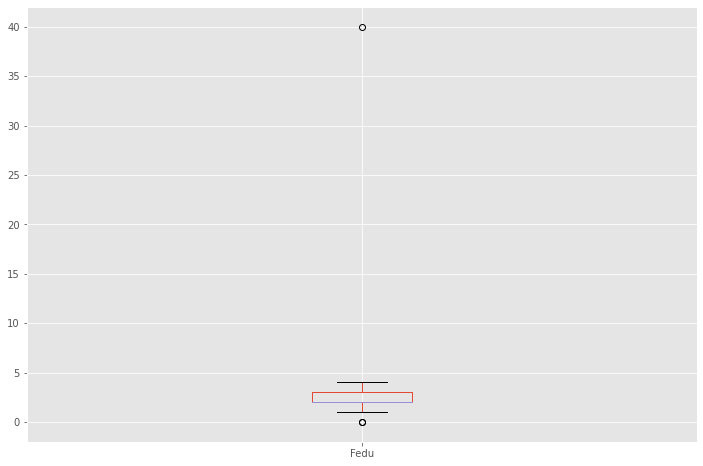

In [92]:
df.boxplot(column=['Fedu'])

есть выбросы

<AxesSubplot:>

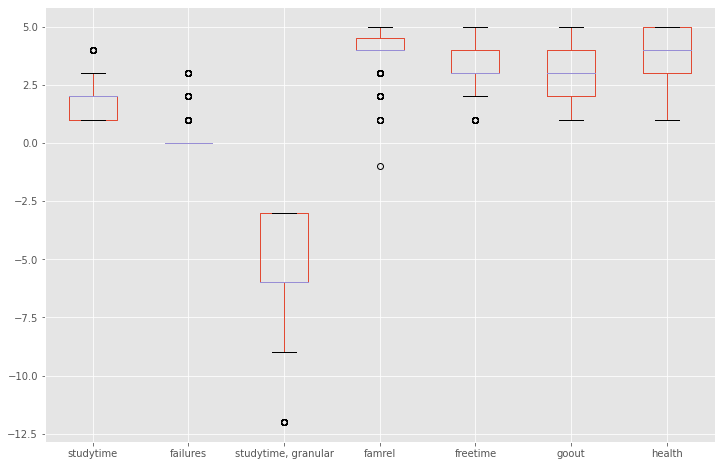

In [93]:
df.boxplot(column=['studytime','failures','studytime, granular','famrel','freetime','goout','health'])

выбросы есть studytime','failures','studytime, granular'

<AxesSubplot:>

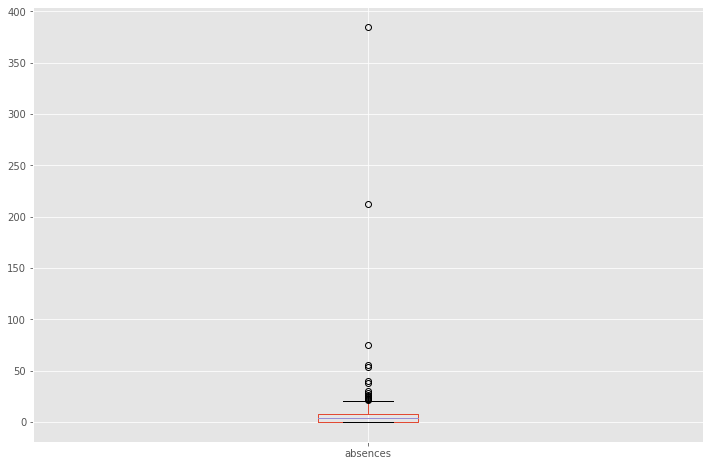

In [94]:
df.boxplot(column=['absences'])

выбросы есть

<AxesSubplot:>

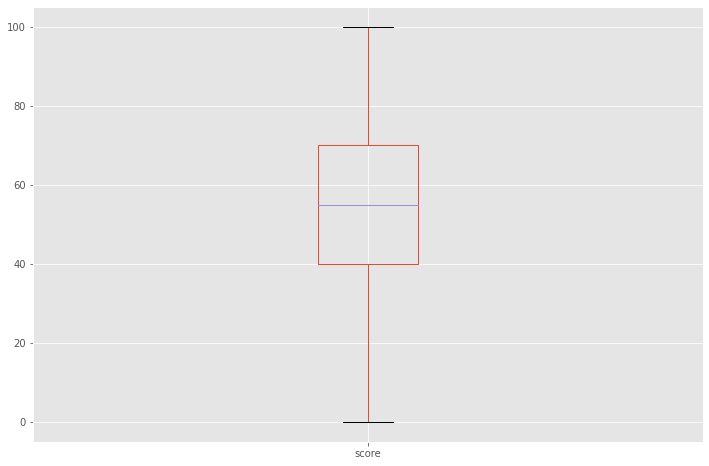

In [95]:
df.boxplot(column=['score'])

выбросов нет

рассмотрим категориальные данные

<AxesSubplot:>

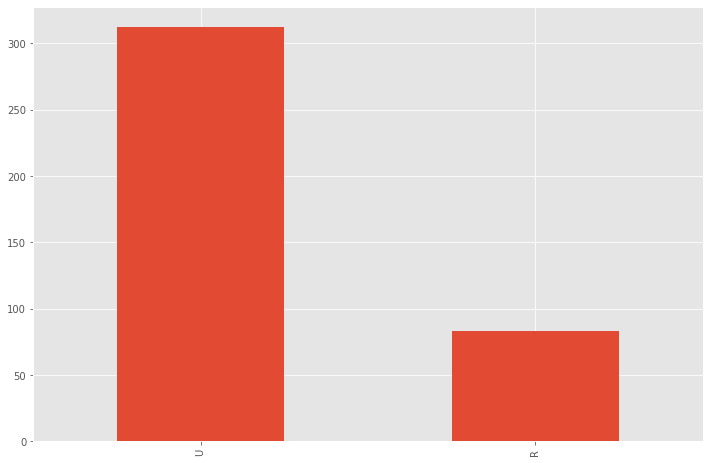

In [24]:
df['address'].value_counts().plot.bar()

<AxesSubplot:>

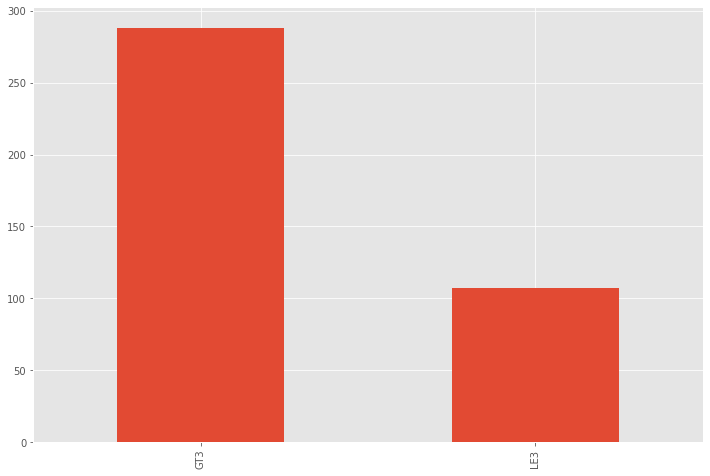

In [25]:
df['famsize'].value_counts().plot.bar()

<AxesSubplot:>

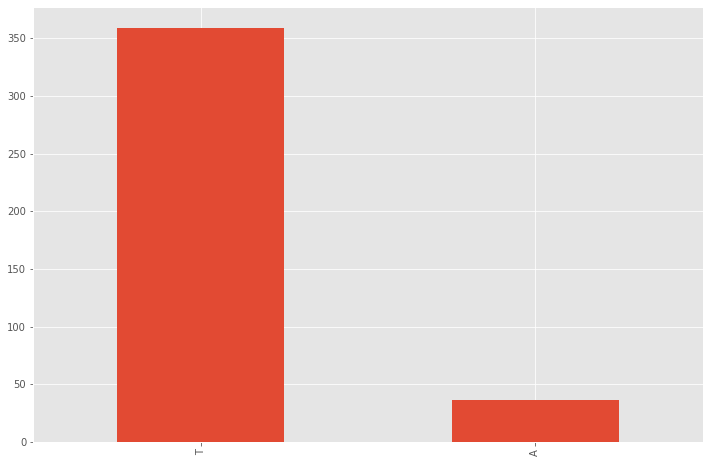

In [26]:
df['Pstatus'].value_counts().plot.bar()

<AxesSubplot:>

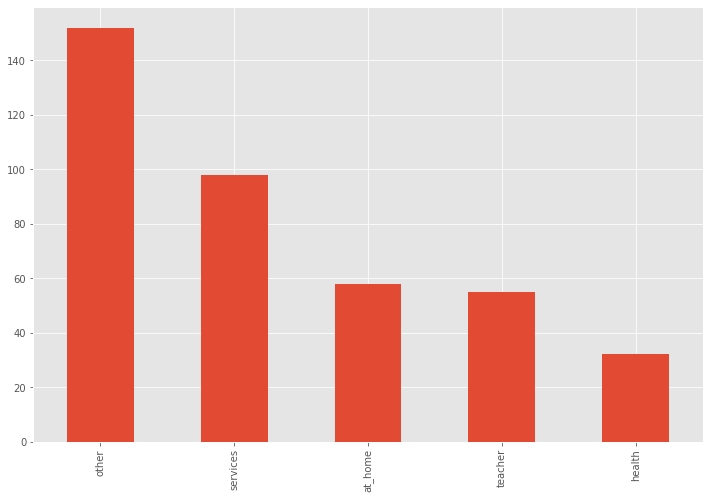

In [27]:
df['Mjob'].value_counts().plot.bar()

<AxesSubplot:>

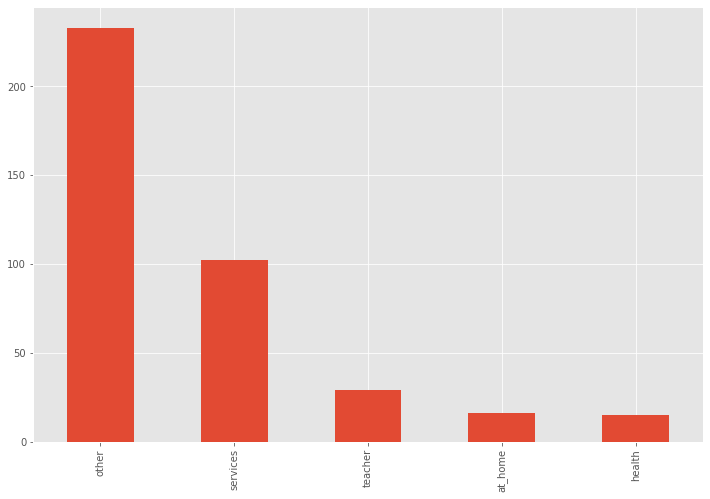

In [28]:
df['Fjob'].value_counts().plot.bar()

<AxesSubplot:>

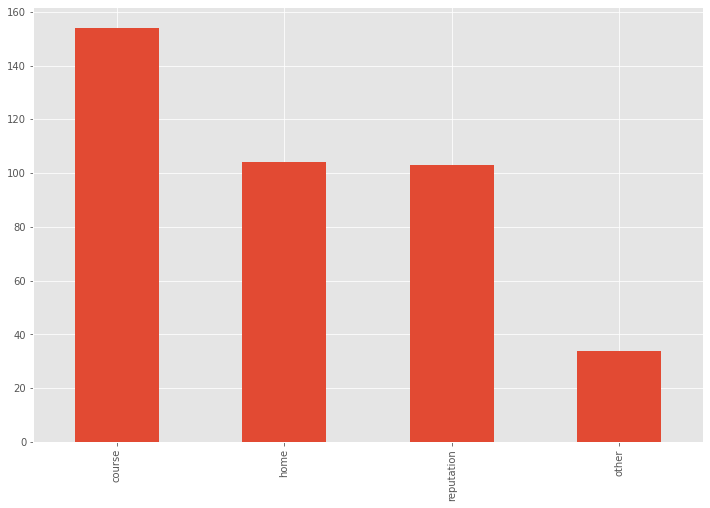

In [29]:
df['reason'].value_counts().plot.bar()

<AxesSubplot:>

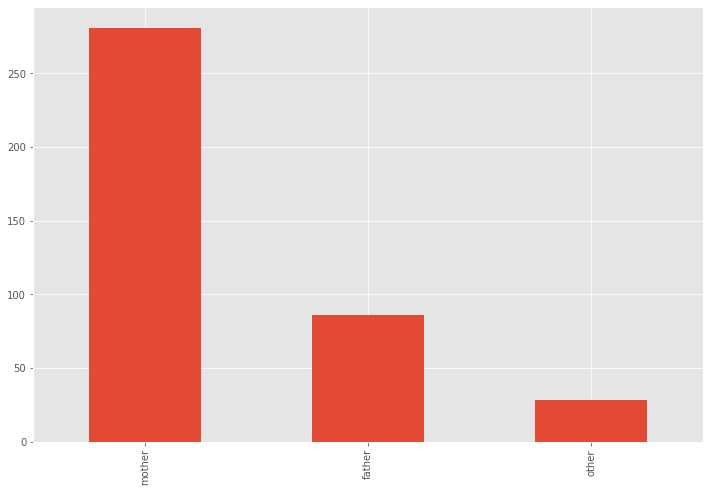

In [30]:
df['guardian'].value_counts().plot.bar()

<AxesSubplot:>

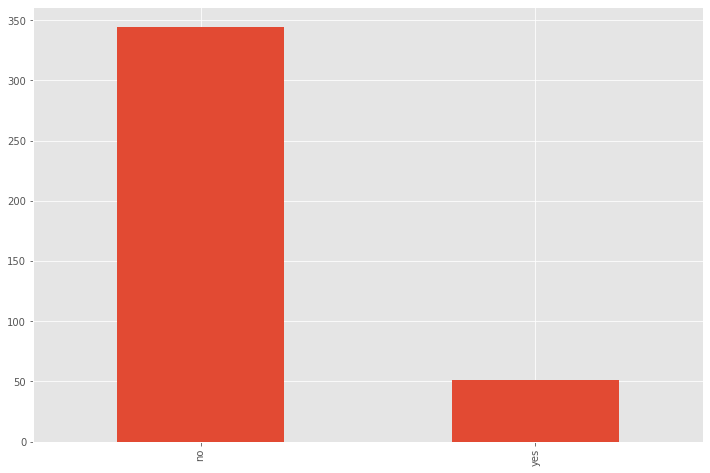

In [31]:
и

<AxesSubplot:>

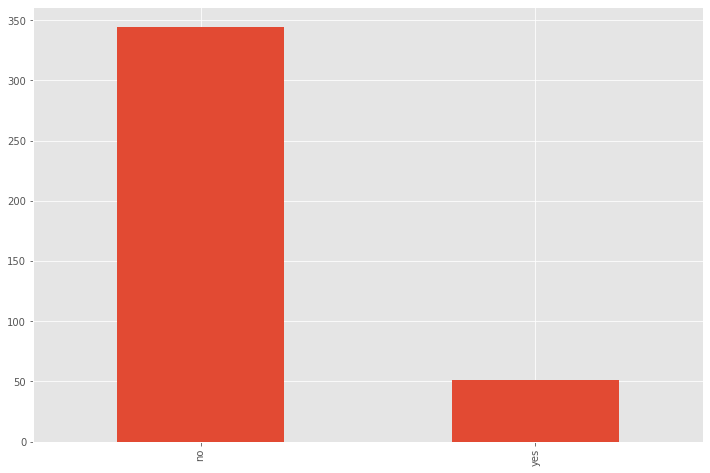

In [32]:
df['schoolsup'].value_counts().plot.bar()

<AxesSubplot:>

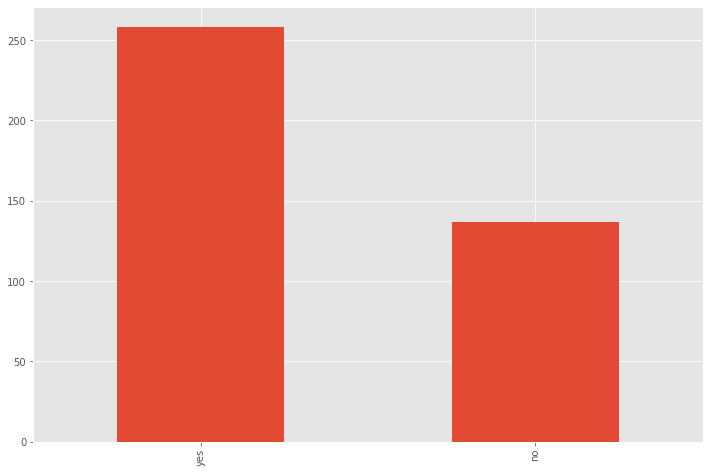

In [34]:
df['famsup'].value_counts().plot.bar()

<AxesSubplot:>

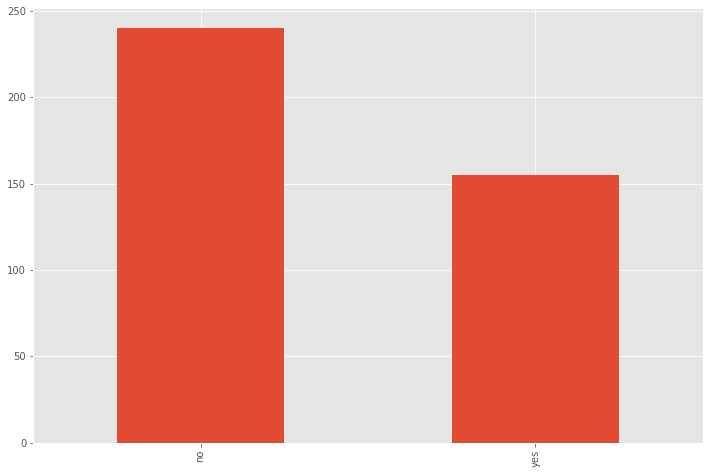

In [35]:
df['paid'].value_counts().plot.bar()

<AxesSubplot:>

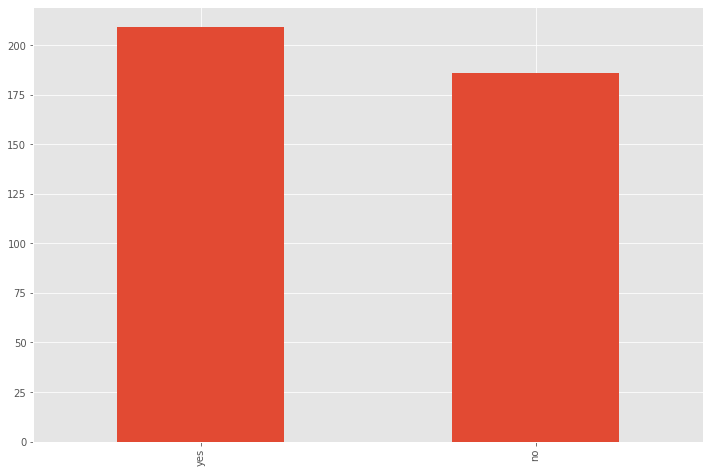

In [36]:
df['activities'].value_counts().plot.bar()

<AxesSubplot:>

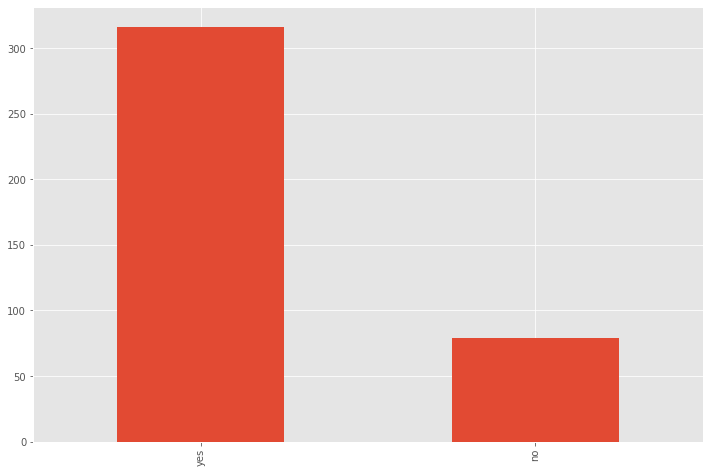

In [38]:
df['nursery'].value_counts().plot.bar()

<AxesSubplot:>

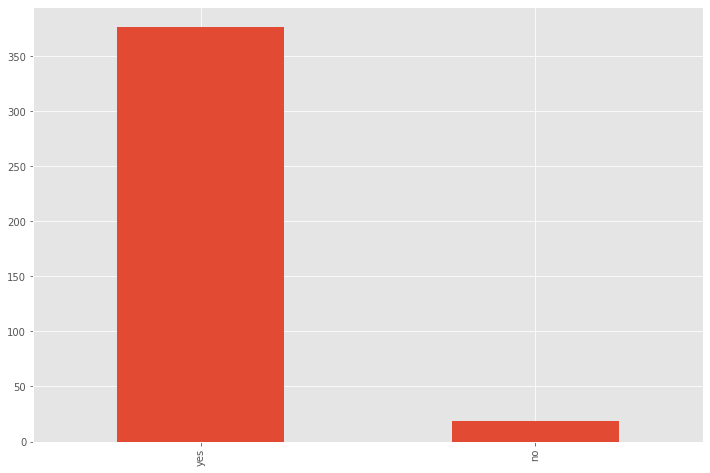

In [39]:
df['higher'].value_counts().plot.bar()

<AxesSubplot:>

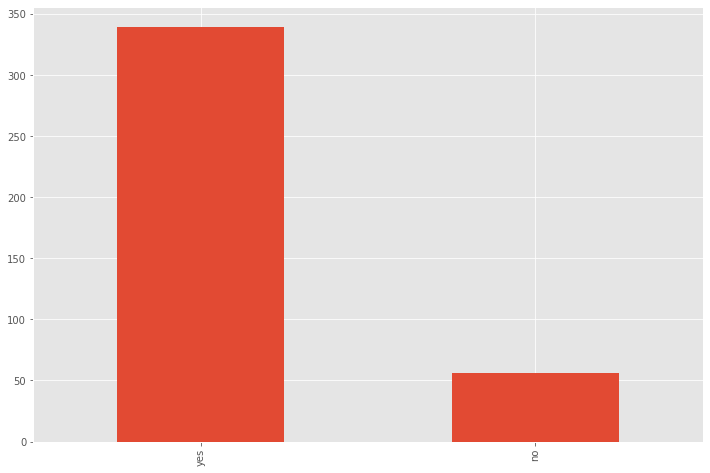

In [40]:
df['internet'].value_counts().plot.bar()

<AxesSubplot:>

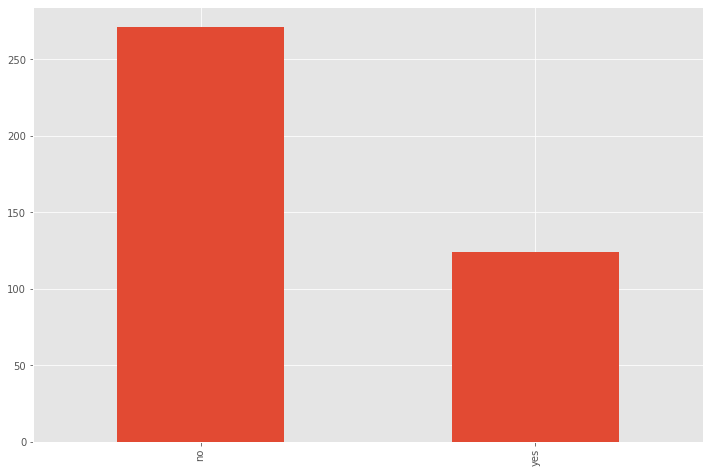

In [41]:
df['romantic'].value_counts().plot.bar()

In [ ]:
Выбросы и избавление от выбрасов.

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


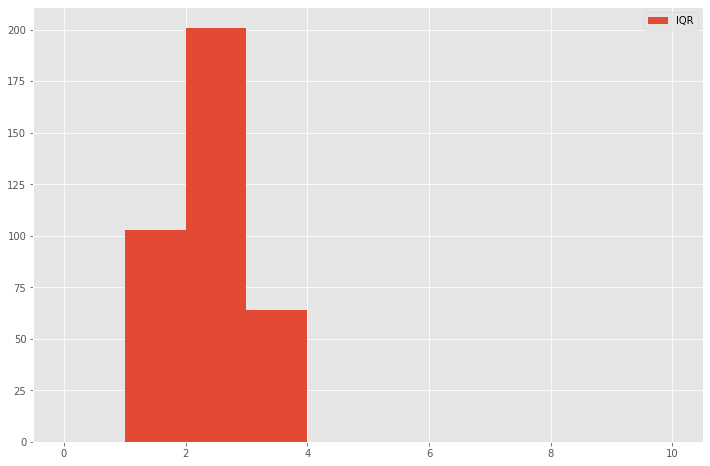

In [100]:
median = df['studytime'].median()
IQR = df['studytime'].quantile(0.75) - df['studytime'].quantile(0.25)
perc25 = df['studytime'].quantile(0.25)
perc75 = df['studytime'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
df['studytime'].loc[df['studytime'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), 
                                                                                             label = 'IQR')
plt.legend();

In [113]:
df = df.loc[df.studytime.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

выбросы и избавление от выбрасов.

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


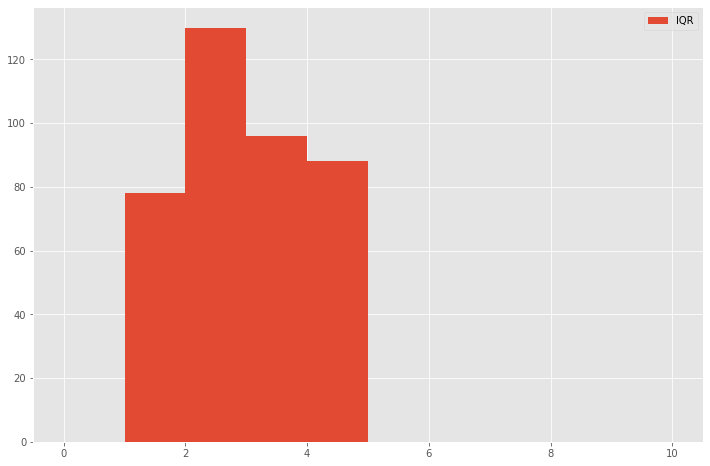

In [101]:
median = df['Fedu'].median()
IQR = df['Fedu'].quantile(0.75) - df['Fedu'].quantile(0.25)
perc25 = df['Fedu'].quantile(0.25)
perc75 = df['Fedu'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
df['Fedu'].loc[df['Fedu'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), 
                                                                                             label = 'IQR')
plt.legend();

In [114]:
df = df.loc[df.Fedu.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0.0, 0.0].


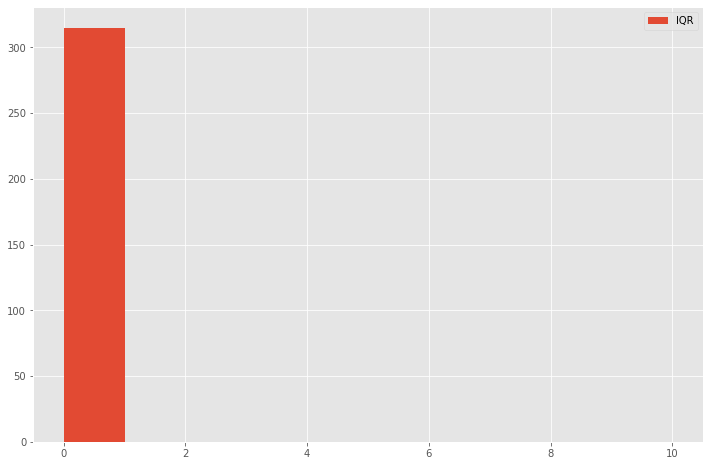

In [105]:
median = df['failures'].median()
IQR = df['failures'].quantile(0.75) - df['failures'].quantile(0.25)
perc25 = df['failures'].quantile(0.25)
perc75 = df['failures'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
df['failures'].loc[df['failures'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), 
                                                                                             label = 'IQR')
plt.legend();

25-й перцентиль: -6.0, 75-й перцентиль: -3.0, IQR: 3.0,  Границы выбросов: [-10.5, 1.5].


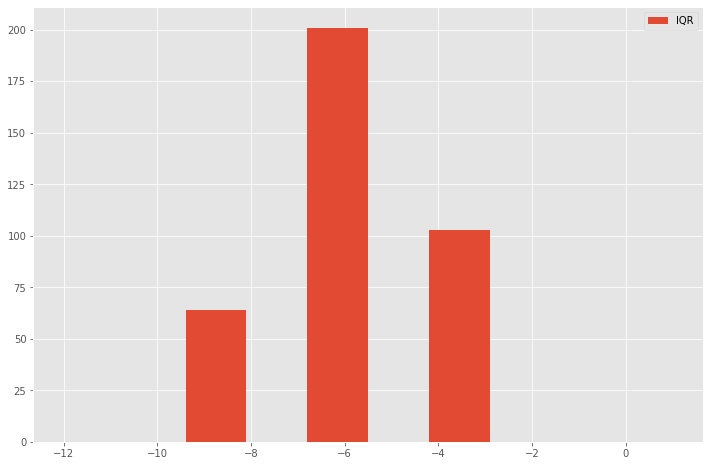

In [109]:
median = df['studytime, granular'].median()
IQR = df['studytime, granular'].quantile(0.75) - df['studytime, granular'].quantile(0.25)
perc25 = df['studytime, granular'].quantile(0.25)
perc75 = df['studytime, granular'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
df['studytime, granular'].loc[df['studytime, granular'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (-12, 1), 
                                                                                             label = 'IQR')
plt.legend();

In [117]:
df = df.loc[df['studytime, granular'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

25-й перцентиль: 4.0, 75-й перцентиль: 4.5, IQR: 0.5,  Границы выбросов: [3.25, 5.25].


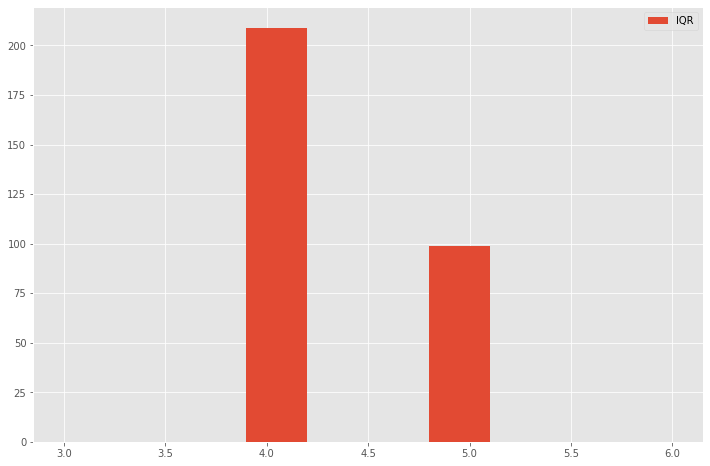

In [111]:
median = df['famrel'].median()
IQR = df['famrel'].quantile(0.75) - df['famrel'].quantile(0.25)
perc25 = df['famrel'].quantile(0.25)
perc75 = df['famrel'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
df['famrel'].loc[df['famrel'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (3, 6), 
                                                                                             label = 'IQR')
plt.legend();

In [118]:
df = df.loc[df.famrel.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


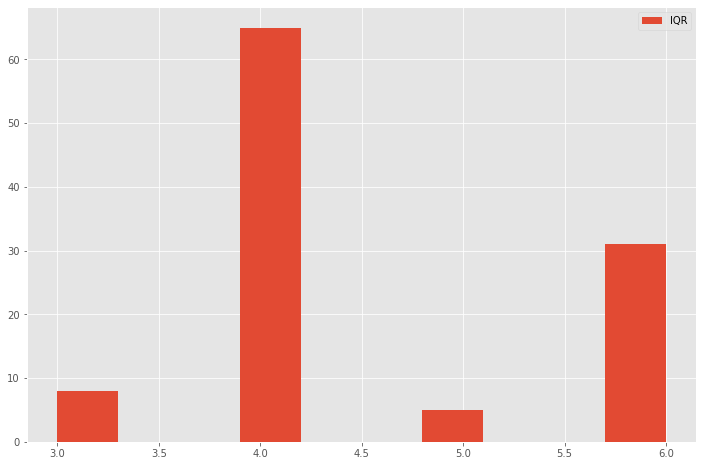

In [112]:
median = df['absences'].median()
IQR = df['absences'].quantile(0.75) - df['absences'].quantile(0.25)
perc25 = df['absences'].quantile(0.25)
perc75 = df['absences'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
df['absences'].loc[df['famrel'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (3, 6), 
                                                                                             label = 'IQR')
plt.legend();

In [119]:
df = df.loc[df.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

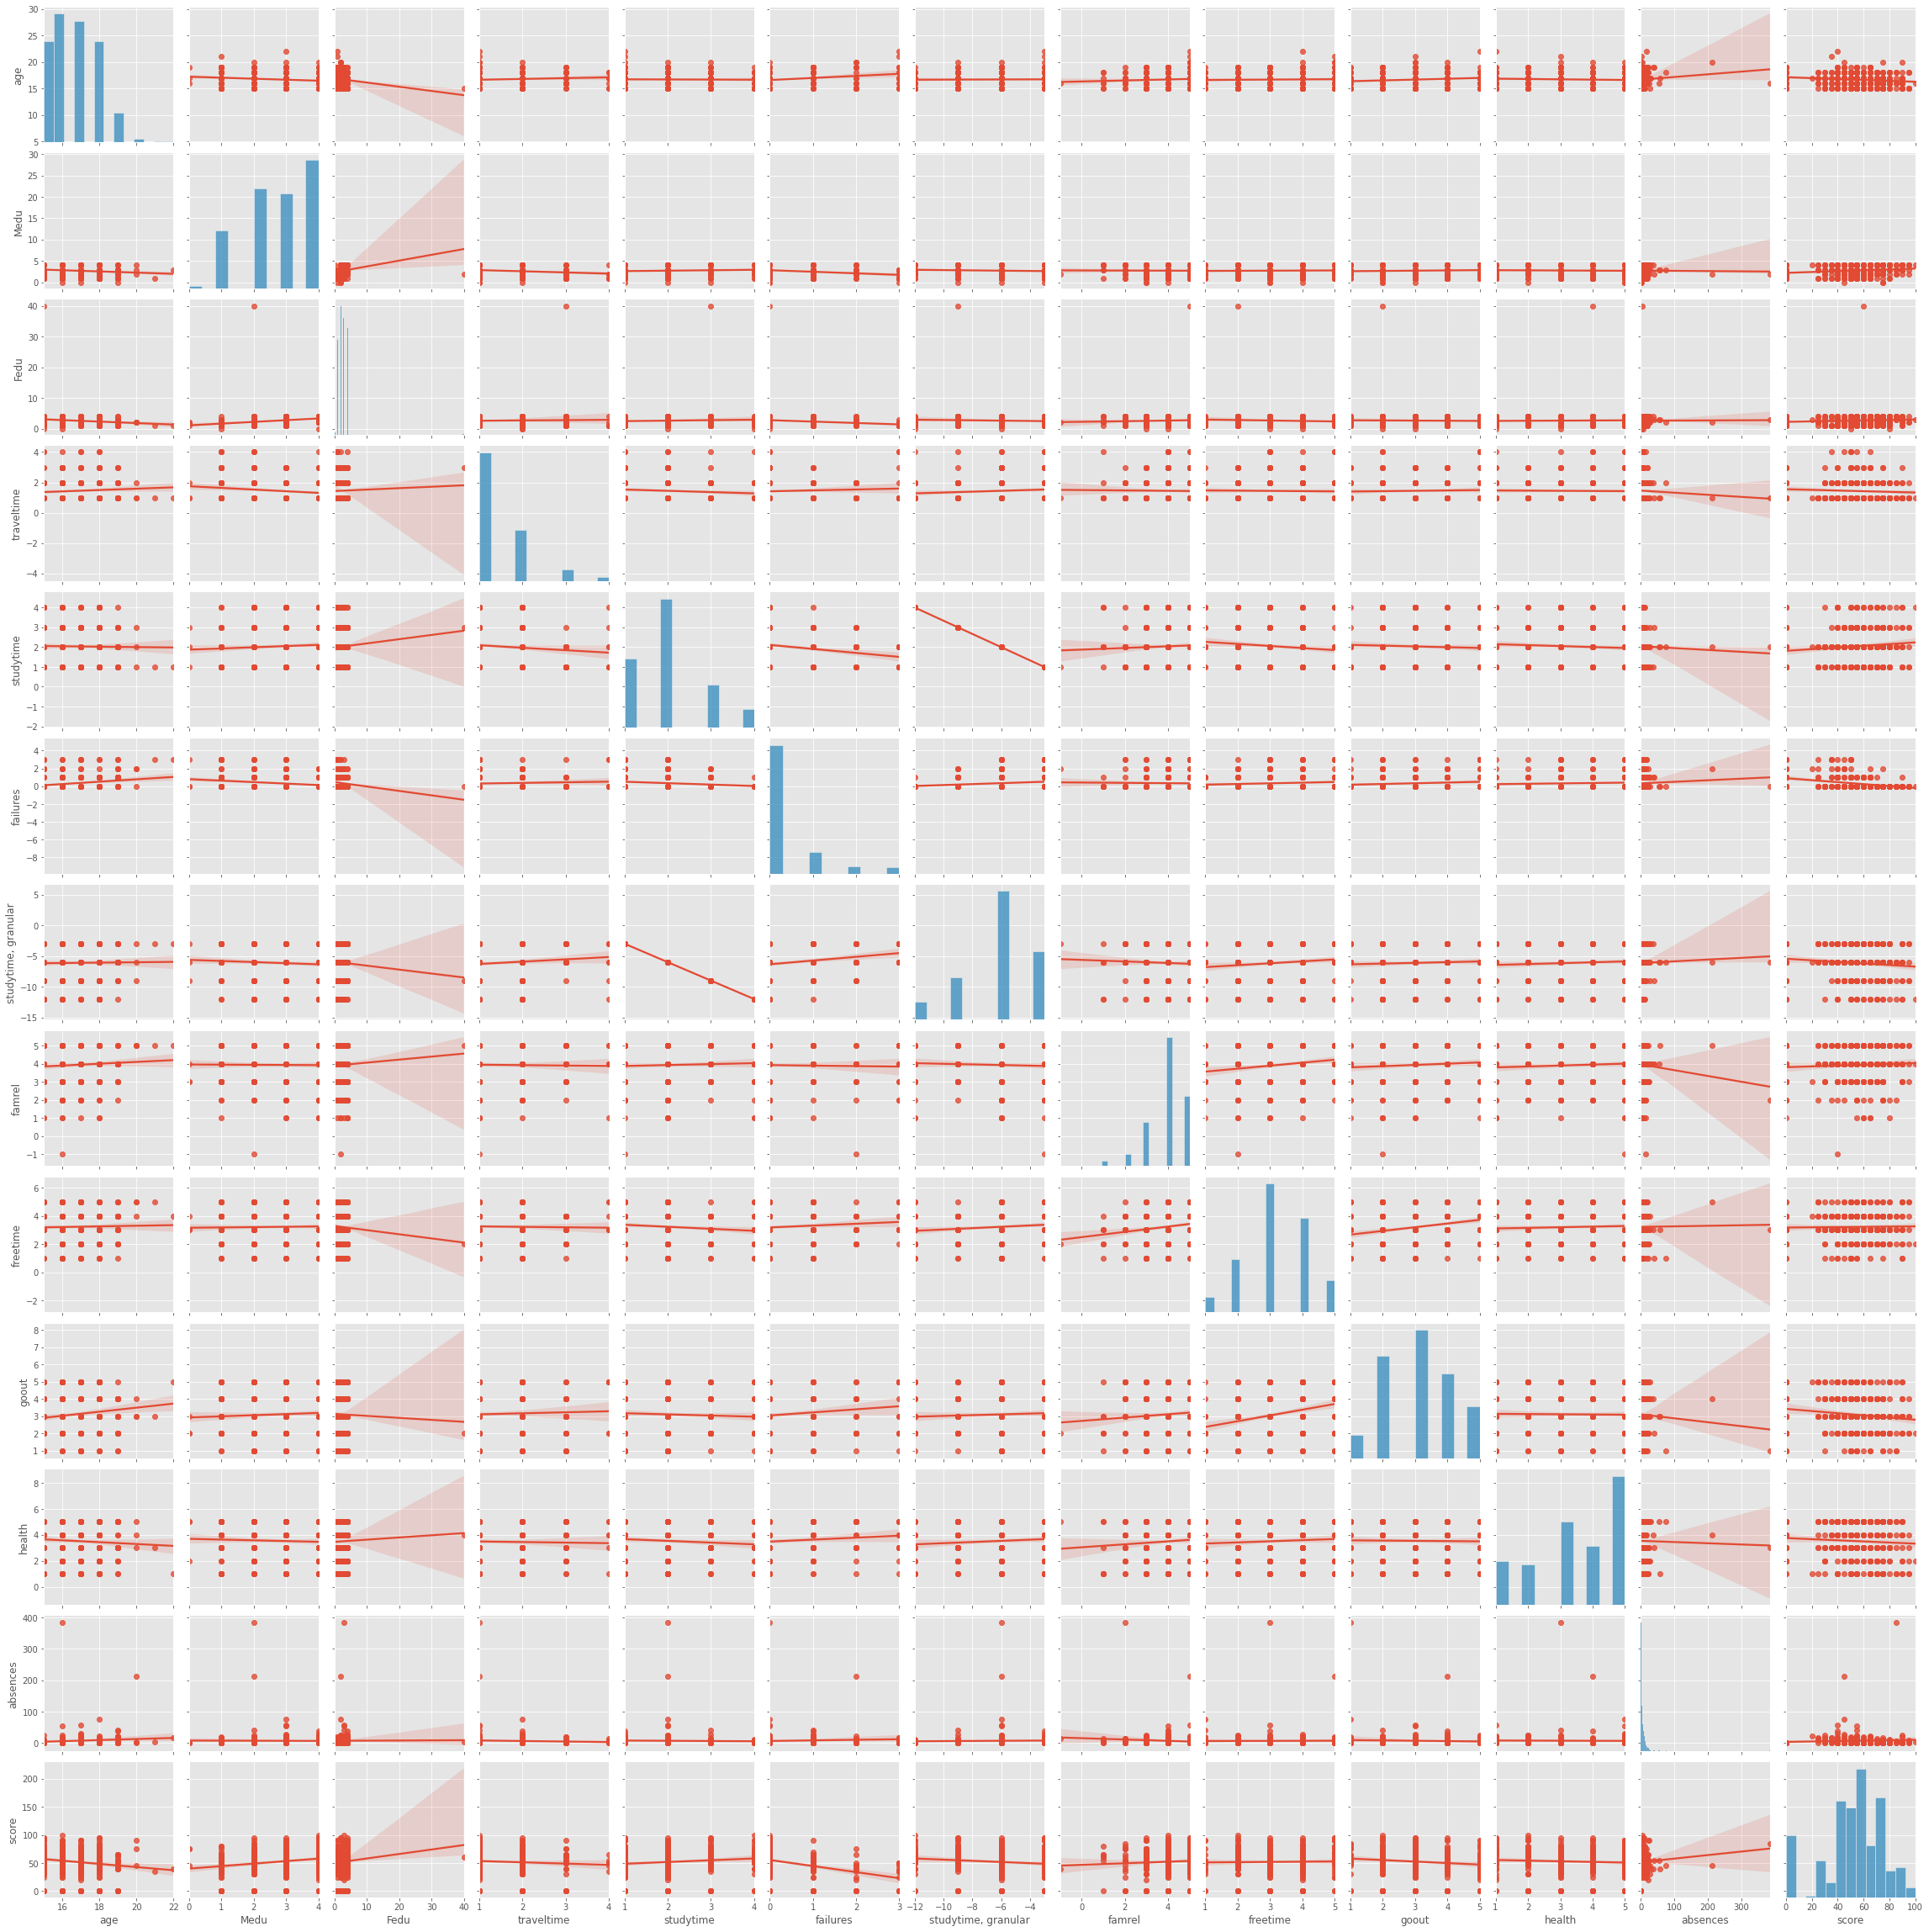

In [3]:
sns.pairplot(df, kind = 'reg')

In [121]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,...,higher_ismissing,internet_ismissing,romantic_ismissing,famrel_ismissing,freetime_ismissing,goout_ismissing,health_ismissing,absences_ismissing,score_ismissing,num_missing
age,1.000000,-0.181392,-0.169092,0.095880,-0.006720,0.216340,0.006720,0.065581,0.045296,0.146478,...,-0.025919,0.014427,-0.085761,0.005144,0.068560,0.024078,0.021201,0.035632,0.150835,-0.036167
Medu,-0.181392,1.000000,0.598594,-0.169689,0.097923,-0.255285,-0.097923,-0.006894,0.043548,0.052358,...,-0.010569,-0.027662,0.008520,-0.000983,-0.041213,-0.031378,-0.098816,-0.038640,-0.123305,-0.042834
Fedu,-0.169092,0.598594,1.000000,-0.131790,0.010541,-0.278254,-0.010541,-0.020069,-0.014310,0.040654,...,-0.066089,0.041155,0.000682,-0.020285,-0.067991,-0.029538,-0.113920,0.076841,-0.075141,-0.070011
traveltime,0.095880,-0.169689,-0.131790,1.000000,-0.089857,0.059813,0.089857,-0.019928,0.006254,0.051760,...,0.096053,-0.003000,-0.086661,-0.037137,0.035633,-0.086679,-0.000159,-0.062324,0.049744,-0.063459
studytime,-0.006720,0.097923,0.010541,-0.089857,1.000000,-0.173413,-1.000000,0.038216,-0.127461,-0.036548,...,-0.054808,-0.115924,-0.003180,-0.013717,0.033389,0.036294,0.054204,-0.027082,0.018761,-0.075871
failures,0.216340,-0.255285,-0.278254,0.059813,-0.173413,1.000000,0.173413,-0.030455,0.080240,0.097417,...,0.035131,-0.003121,-0.031191,-0.000994,-0.018983,-0.012239,-0.012247,0.047369,0.120810,0.076411
"studytime, granular",0.006720,-0.097923,-0.010541,0.089857,-1.000000,0.173413,1.000000,-0.038216,0.127461,0.036548,...,0.054808,0.115924,0.003180,0.013717,-0.033389,-0.036294,-0.054204,0.027082,-0.018761,0.075871
famrel,0.065581,-0.006894,-0.020069,-0.019928,0.038216,-0.030455,-0.038216,1.000000,0.172410,0.078800,...,0.014294,0.061038,0.029162,0.016888,0.029059,-0.052370,0.042864,-0.039243,0.055110,0.076437
freetime,0.045296,0.043548,-0.014310,0.006254,-0.127461,0.080240,0.127461,0.172410,1.000000,0.276576,...,0.052256,0.064117,-0.016638,0.004112,-0.041238,-0.019767,0.030641,0.014776,0.054261,0.061961
goout,0.146478,0.052358,0.040654,0.051760,-0.036548,0.097417,0.036548,0.078800,0.276576,1.000000,...,0.021353,0.020610,0.015508,0.020710,-0.094613,-0.014583,0.004557,0.092129,0.083919,0.027224


Вывод: явных зависимостейне обнаружено. 
Хотя предварительный анализ с помощью библиотеки pandas profiling (файл с этой библиотекой не загрузился в GitHub - выдает ошибку) выдал следующее:
        корреляция score и failures (обратная зависисмоть). Замечена сильная корреляция между studytime и guardian (обратная зависисмость).